# Linear Regression

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt

In [8]:
#Creating linear data for running the Regression Model
X = 2 * np.random.rand(100, 1) #Creating X-values using Uniform Distribution Noise
y = 4 + 3 * X + np.random.randn(100, 1) #Creating Y-values using Normal Distribution Noise

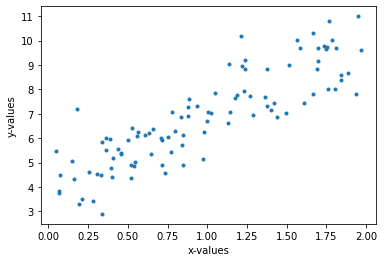

In [16]:
#Plotting the data
plt.plot(X, y, ".")
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

## Using Drect Computation of the Normal Equation

In [11]:
#Using the Normal Equation to compute the value of Theta to minimize the Cost function
X_b = np.c_[np.ones((100,1)), X] #Adding X_0 = 1 to every instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
#Viewing the best value of hyperparameter
theta_best

array([[3.96260285],
       [2.96289711]])

In [15]:
#Now making predicitions using the obtained hyperparameter value
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.96260285],
       [9.88839707]])

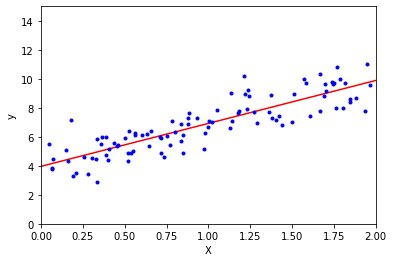

In [24]:
#Viewing the plot for the predicted value
def plot_linear_reg(predictions):
  plt.plot(X_new, predictions, "r-")
  plt.plot(X, y, "b.")
  plt.axis([0, 2, 0, 15])
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

plot_linear_reg(y_predict)

## Using Scikit Learn Linear Regressor

In [20]:
#We can perform the equivalent operation in Scikit Learn as follows
linear_reg = LinearRegression() #Creating a LinearRegression Model instance
linear_reg.fit(X, y)
linear_reg.intercept_, linear_reg.coef_

(array([3.96260285]), array([[2.96289711]]))

In [21]:
#Predicting the new values using trained Linear Regressor
linear_reg.predict(X_new)

array([[3.96260285],
       [9.88839707]])

## Using Gradient Descent

In [23]:
#Using Batch Gradient Descent

eta = 0.1 #Initializing value for the learning rate
n_iterations = 1000 #Number of iterations to perform
m = 100 #Total number of samples

theta = np.random.randn(2,1) #Random initialization for the parameter

#Running the gradient descent for each iteration
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #Computing the value for the gradients
  theta = theta - eta * gradients #Computing the new theta value from gradient and learning rate

#Viewing the final value obtained
theta

array([[3.96260285],
       [2.96289711]])

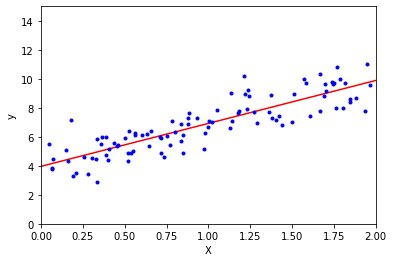

In [26]:
#Viewing the results on the prediction set
y_batch_predict = X_new_b.dot(theta)
plot_linear_reg(y_batch_predict)

In [27]:
#Using Stochastic Gradient Descent

n_epochs = 50 #Number of times to run algorithm on the dataset
t0, t1 = 5, 50 #Defining learning schedule hyper parameters

#Defining a method for computing learning rate using the schedule
def learning_schedule(t):
  return t0 / (t + t1)

#Defining a random value for the parameter from a Normal Distribution
theta = np.random.randn(2,1)

#Applying the algorithm for defined epochs of training
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m) #Taking some random index from total m sample indices
    xi = X_b[random_index: random_index+1] #Taking a single value from the dataset at a time
    yi = y[random_index: random_index+1] #Taking a single value from the dataset at a time

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #Computing graidents for the selected random indices
    eta = learning_schedule(epoch * m + i) #Computing learning rate for theta value
    theta = theta - eta * gradients #Computing theta value using learning rate and gradient value

#Viewing the final value obtained
theta

array([[3.92002276],
       [3.01895162]])

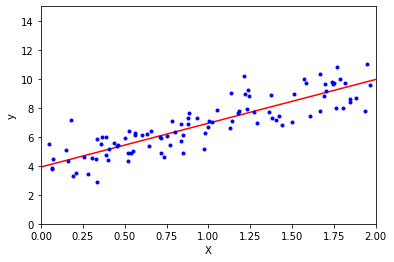

In [28]:
#Viewing the prediction results from obtained parameter value
y_sgd_predict = X_new_b.dot(theta)
plot_linear_reg(y_sgd_predict)

# Using Scikit SGD Regressor

In [33]:
#Computing SGD Regressor for 50 epochs and with learning rate 0.1
sgd_regressor = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
#Predicting values using the trained SGD Regressor
sgd_regressor.predict(X_new)

array([3.96188193, 9.87788203])